# Convolutional Neural Networks

## The Essence of CNNs

Images are 2D grids of pixel values, and the spatial arrangement of these pixels.
The main idea behind CNNs lies in their ability to capture both local and global patterns in the data, making them well-suited for tasks where the spatial relationships of features are important (like in complex image structures). CNNs consist of multiple layers: 
* **Convolutional layers** operations scan the input image using small filters or kernels, which slide over the image, capturing local features and patterns, making CNNs inherently suitable for images. 
* **Pooling layers** that reduce the spatial dimensions of the data, helping to make the network more robust to variations in position and scale. 
* **Fully connected layers**, which perform the actual classification or regression tasks, as they do in classical neural networks. 
  
This hierarchical approach enables CNNs to understand complex image structures.

## Data Set - cifar10


The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.[3] The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.
The CIFAR-10 is a labeled subset of 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.
source:https://en.wikipedia.org/wiki/CIFAR-10

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [27]:
# Import the data from the library - written with the help of CHATGPT
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train / 255.0 
x_test = x_test / 255.0

## Applying a regular Neural Network Model

In [28]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten



# Define the neural network model
NNmodel = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax'),
])

# Compile the model
NNmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
NNmodel.fit(x_train, y_train, epochs=10, batch_size=60, # validation_split=0.2
          )

Epoch 1/10
834/834 [==============================] - 13s 13ms/step - loss: 2.0647 - accuracy: 0.2199
Epoch 2/10
834/834 [==============================] - 12s 14ms/step - loss: 1.9459 - accuracy: 0.2777
Epoch 3/10
834/834 [==============================] - 11s 13ms/step - loss: 1.9016 - accuracy: 0.2992
Epoch 4/10
834/834 [==============================] - 9s 11ms/step - loss: 1.8825 - accuracy: 0.3100
Epoch 5/10
834/834 [==============================] - 11s 13ms/step - loss: 1.8636 - accuracy: 0.3203
Epoch 6/10
834/834 [==============================] - 13s 16ms/step - loss: 1.8564 - accuracy: 0.3239
Epoch 7/10
834/834 [==============================] - 15s 18ms/step - loss: 1.8469 - accuracy: 0.3277
Epoch 8/10
834/834 [==============================] - 12s 15ms/step - loss: 1.8371 - accuracy: 0.3312
Epoch 9/10
834/834 [==============================] - 11s 13ms/step - loss: 1.8315 - accuracy: 0.3350
Epoch 10/10
834/834 [==============================] - 8s 10ms/step - loss: 1.8291 

In [29]:
# Make predictions on the data - written with the help of CHATGPT
y_train_pred = NNmodel.predict(x_train)
y_test_pred = NNmodel.predict(x_test)

import numpy as np
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate the classification report
from sklearn.metrics import classification_report

# Print the classification reports
print('NEURAL NETWORK')
print('\nTrain classification report:\n', classification_report(y_train, y_train_pred_classes))
print('-'*70)
print('\nTest classification report:\n',  classification_report(y_test, y_test_pred_classes))

313/313 [==============================] - 1s 2ms/step
NEURAL NETWORK

Train classification report:
               precision    recall  f1-score   support

           0       0.53      0.35      0.42      5000
           1       0.52      0.51      0.51      5000
           2       0.22      0.04      0.07      5000
           3       0.27      0.24      0.25      5000
           4       0.31      0.39      0.34      5000
           5       0.38      0.29      0.33      5000
           6       0.31      0.61      0.41      5000
           7       0.42      0.48      0.44      5000
           8       0.49      0.60      0.54      5000
           9       0.48      0.44      0.46      5000

    accuracy                           0.39     50000
   macro avg       0.39      0.39      0.38     50000
weighted avg       0.39      0.39      0.38     50000

----------------------------------------------------------------------

Test classification report:
               precision    recall  f1-s

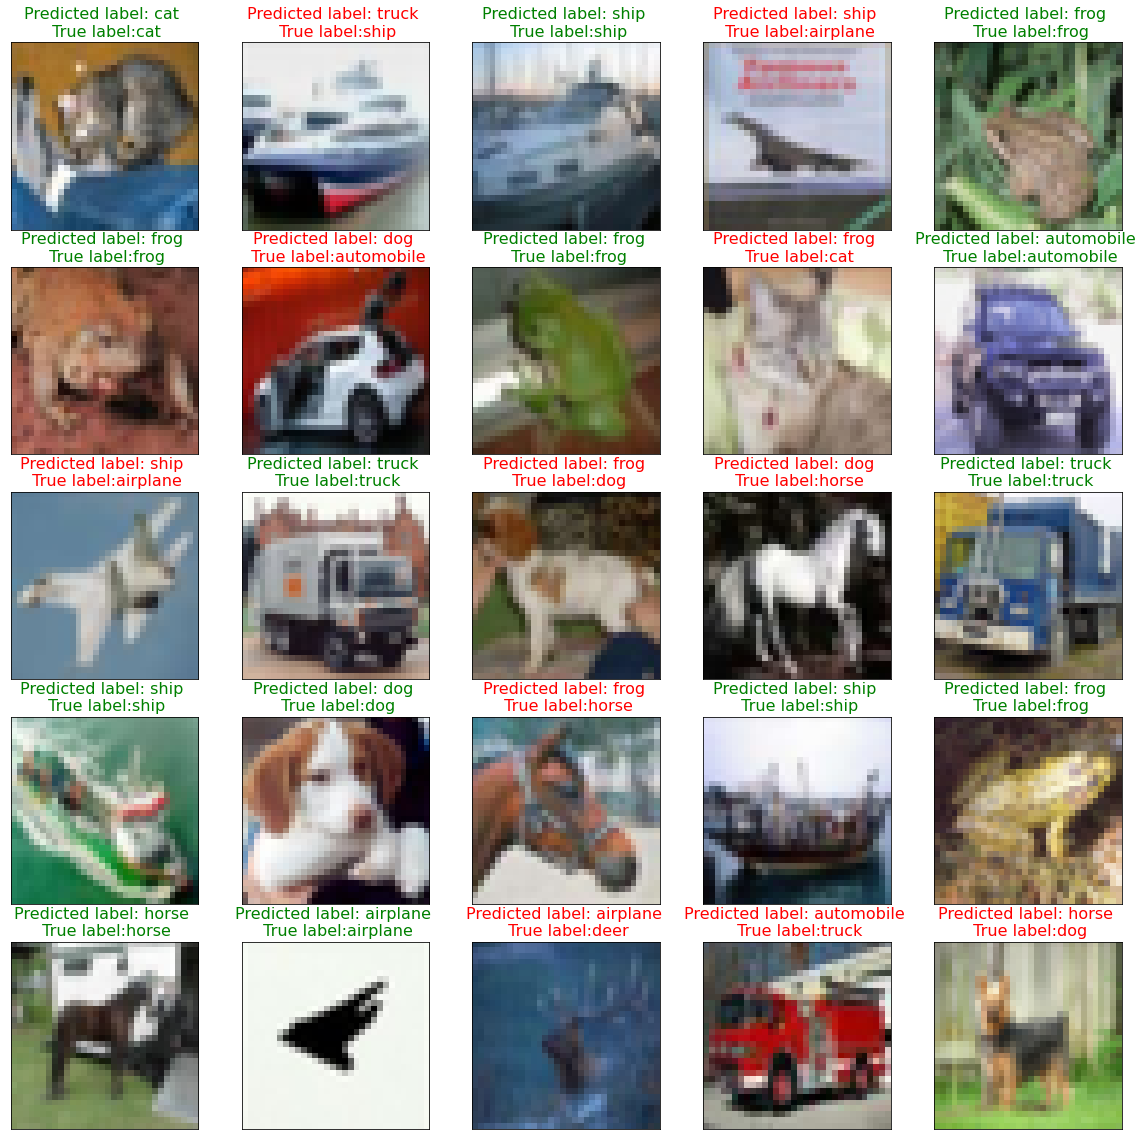

In [30]:
# show some images and their predictions
import matplotlib.pyplot as plt
import numpy as np

# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Define the figure size
plt.figure(figsize=(20,20))

# Loop through the first 25 images in the test set

for i in range(25):
    # Define the subplot
    plt.subplot(5,5,i+1)
    # Plot the image
    plt.imshow(x_test[i])
    # Define the label of the image in a white color and the actual label in green color if right or red color if wrong
    if y_test_pred_classes[i] == y_test[i]:
        color = 'green'
    else:
        color = 'red'
    plt.title(f'Predicted label: {labels[y_test_pred_classes[i]]} \n True label:{labels[y_test[i][0]]}'
              , color=color,fontsize=16)
            #   '
    # Remove the x and y ticks
    plt.xticks([])
    plt.yticks([])

# Show the plot
plt.show()


## Applying Convolutional Neural Network

In [31]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Define the CNN model - written with the help of CHATGPT
CNNmodel = Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model
CNNmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
CNNmodel.summary()

# Train the model
CNNmodel.fit(x_train, y_train, epochs=10, batch_size=50)

# Make predictions on the data
CNN_y_train_pred = CNNmodel.predict(x_train)
CNN_y_test_pred = CNNmodel.predict(x_test)

import numpy as np
y_train_pred_classes = np.argmax(CNN_y_train_pred, axis=1)
y_test_pred_classes = np.argmax(CNN_y_test_pred, axis=1)

# Calculate the classification report
from sklearn.metrics import classification_report

# Print the classification reports
print('CONVOLUTIONAL NEURAL NETWORK')
print('\nTrain classification report:\n', classification_report(y_train, y_train_pred_classes))
print('-'*70)
print('\nTest classification report:\n',  classification_report(y_test, y_test_pred_classes))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 6, 6, 64)         

The `NNmodel` underfitted in terms of all of the scores. However, `CNNModel` produced much better results at all metrics. 

Overall, the convolutional model preformed the best, with a slight overfitting to the train set. 
There are two classes, in which both models preformed poorly, class 3 especially, and also class 2.

## Visualizing my predictions

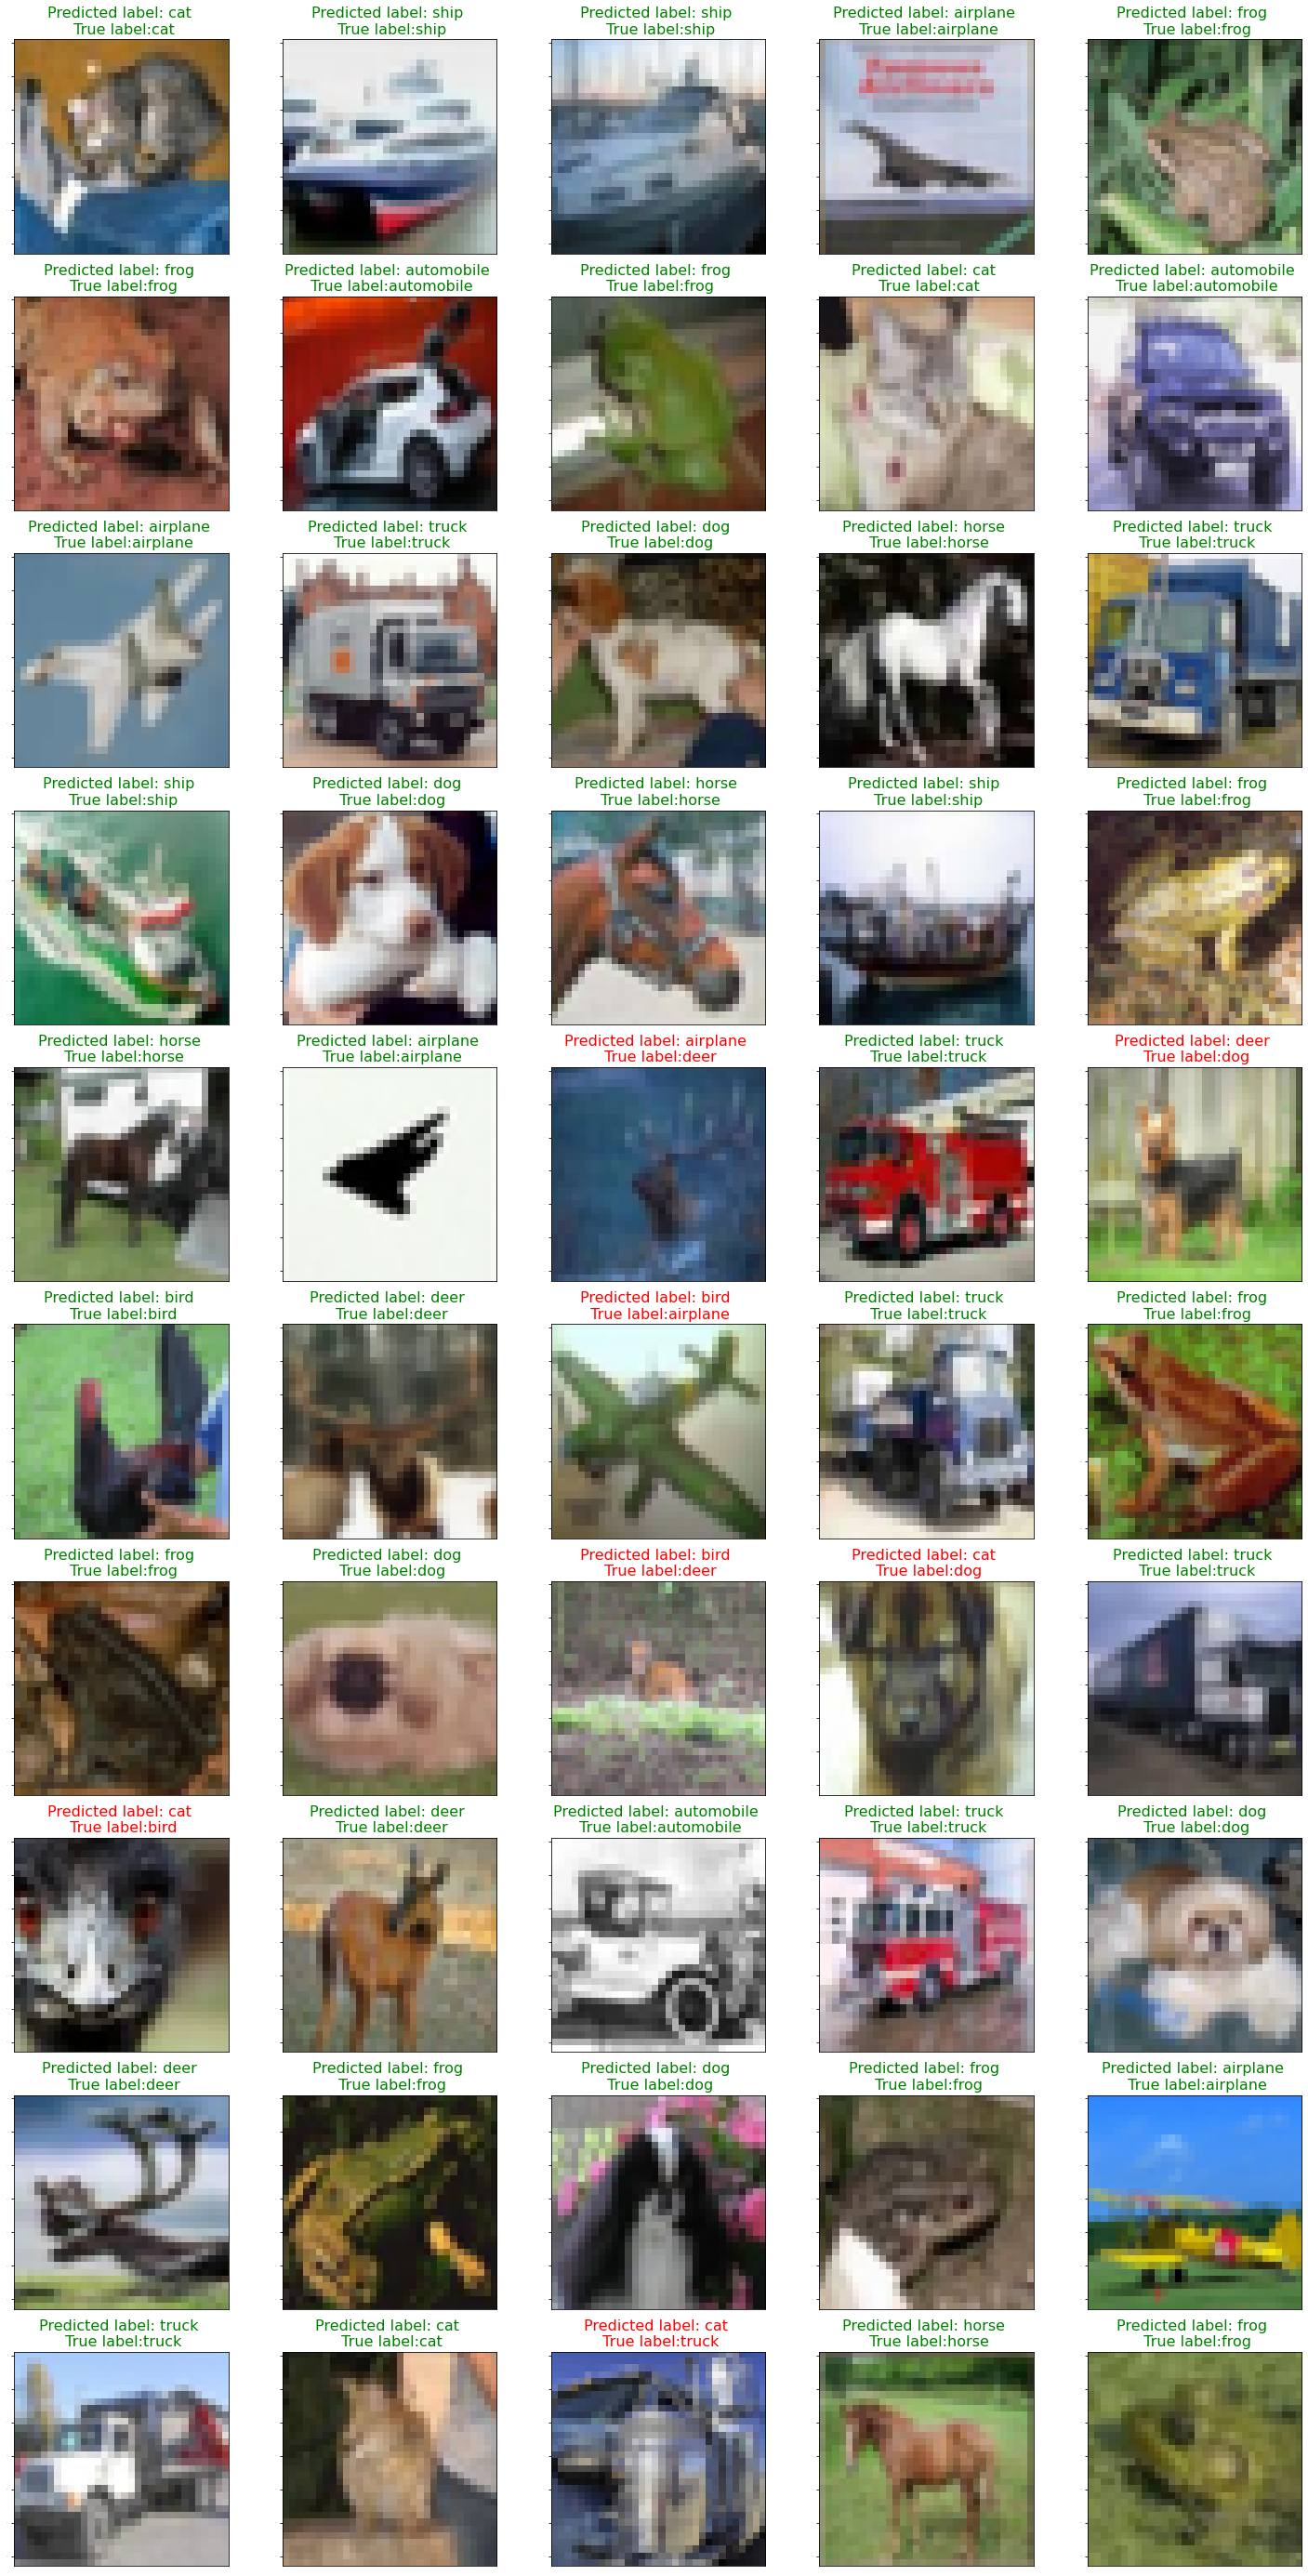

In [58]:
# show some images and their predictions for the CNN model
import matplotlib.pyplot as plt
import numpy as np

# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Define the figure size
plt.figure(figsize=(25,50))

# Loop through the first 25 images in the test set
# make more space between the images

for i in range(50):
    # Define the subplot
    plt.subplot(10,5,i+1)
    # Plot the image
    plt.imshow(x_test[i])
    # Define the label of the image in a white color and the actual label in green color if right or red color if wrong
    if y_test_pred_classes[i] == y_test[i]:
        color = 'green'
    else:
        color = 'red'
    plt.title(f'Predicted label: {labels[y_test_pred_classes[i]]} \n True label:{labels[y_test[i][0]]}'
              , color=color,fontsize=16)
    # make the ticks white
    # plt.xticks(color='w')
    plt.xticks([])
    plt.yticks(color='g', fontsize=1)
    # plt.yticks([])
# Show the plot
plt.show()
